In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import distance
import main

1. Mitchell algorithm generates distribution

In [2]:
r = 2
grid = [100, 100]
width, height = grid

m = 2       # number of starting points
N = 128     # number of all points

In [3]:
## Selects two random points on a grid
initial = np.array([ [random.uniform(0,1)*width, random.uniform(0,1)*height] for i in range(m) ])

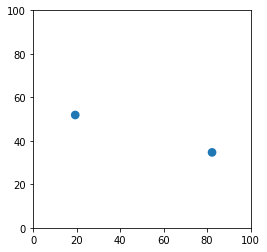

In [5]:
plt.axes()

for center in initial:
    circle = plt.Circle(center, radius=r)
    plt.gca().add_patch(circle)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

In [8]:
## now generate distribution with Mitchell algorithm
dist = naloga.distribution(initial, grid, N)
#display(dist.samples)

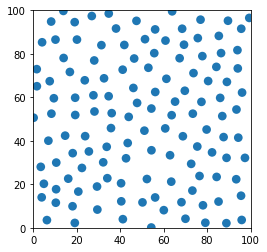

In [9]:
plt.axes()

for center in dist.samples:
    circle = plt.Circle(center, radius=r)
    plt.gca().add_patch(circle)

    # print(center[0], center[1], sep='\t', file=open('porazdelitev.txt', 'a'))

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

____
2. Turn points into ellipses with random orientations

In [10]:
a, b = 5, 2                     # small and big semi-axis
a_width, b_height = 2*a, 2*b    # small and big semi-axis for patches
eps = math.sqrt(1-(b/a)**2)     # eccentricity

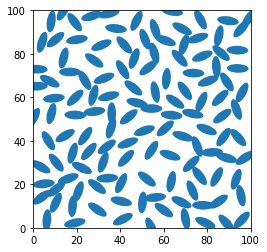

In [11]:
## generate ellipses
plt.axes()

new_dist = naloga.ellipses(dist, a, b)

for center in new_dist.ell:
    ellipse = naloga.ellipse.convert_to_patches(center, a_width, b_height)
    plt.gca().add_patch(ellipse)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
# plt.savefig("elipse_512.png")
plt.show()


_____
3. Wertheim-Perramo contact function

In [9]:
## distance matrix between all the centres
S = [x.center for x in new_dist.ell]
razdalje = distance.cdist(S, S, dist.periodic_metric)

## matrix of neighbouring ellipses, which are less than 2*a apart
in_proximity = [np.where((line<=2*a) & (line!=0)) for line in razdalje]

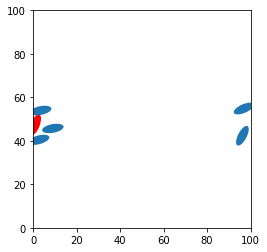

In [14]:
## select ellipse 'i' and check its proximity
i = 92
i_ellipse = new_dist.ell[i]

plt.axes()
ell_patch = naloga.ellipse.convert_to_patches(i_ellipse, a_width, b_height)
plt.gca().add_patch(ell_patch)
ell_patch.set_facecolor('r')

check = new_dist.ell[in_proximity[i]]
for E in check:
    ell_patch = naloga.ellipse.convert_to_patches(E, a_width, b_height)
    plt.gca().add_patch(ell_patch)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

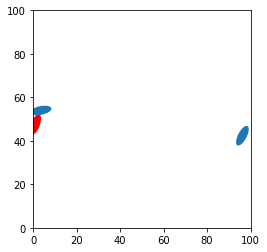

In [15]:
## display only those ellipses that are touching or overlapping i-th ellipse
neighbourhood = np.array([new_dist.mu(i_ellipse, neighbour) for neighbour in check])

plt.axes()

ell_patch = naloga.ellipse.convert_to_patches(i_ellipse, a_width, b_height)
plt.gca().add_patch(ell_patch)
ell_patch.set_facecolor('r')

in_contact = check[np.where(neighbourhood<1)]
for E in in_contact:
    ell_patch = naloga.ellipse.convert_to_patches(E, a_width, b_height)
    plt.gca().add_patch(ell_patch)

plt.axis('scaled')
plt.xlim(0.0, width)
plt.ylim(0.0, height)
plt.show()

___